In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/content/drive/MyDrive/신입기수 프로젝트/Dataset')

# 데이터 불러오기

In [ ]:
data = pd.read_csv('rawdata.csv')
data

,날짜,현재수위,유입량,저수량,공용량,방류량,강화대교_조위,청담대교_유량,잠수교_유량,한강대교_유량,행주대교_유량,대곡교_강수량,진관교_강수량,송정동_강수량,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,2012-05-01 00:00,24.800,555.00,219.07,24.93,555.00,445.0,469.05,0.0,729.80,540.18,0.0,0.0,0.0,310.7,300.2,290.0,275.3
1,2012-05-01 00:10,24.794,464.60,218.86,25.15,562.90,449.0,498.00,0.0,731.48,540.18,0.0,0.0,0.0,314.7,300.2,290.0,275.3
2,2012-05-01 00:20,24.789,478.10,218.69,25.31,576.40,451.0,490.68,0.0,726.42,540.18,0.0,0.0,0.0,313.7,301.2,290.0,275.3
3,2012-05-01 00:30,24.789,464.80,218.69,25.31,563.10,452.0,476.21,0.0,726.42,552.17,0.0,0.0,0.0,311.7,301.2,290.0,276.3
4,2012-05-01 00:40,24.789,478.10,218.69,25.31,576.40,450.0,476.21,0.0,707.17,564.29,0.0,0.0,0.0,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276331,2022-07-18 23:10,25.040,259.23,212.86,31.14,259.23,510.0,319.84,NaN,-456.41,974.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276332,2022-07-18 23:20,25.040,260.46,212.86,31.14,260.46,492.0,314.01,NaN,-717.30,1006.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276333,2022-07-18 23:30,25.040,259.37,212.86,31.14,259.37,475.0,387.55,NaN,-843.37,1039.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276334,2022-07-18 23:40,25.040,259.13,212.86,31.14,259.13,458.0,454.91,NaN,-1023.37,1073.46,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 강화대교 조위 결측치 처리

In [ ]:
gangwha = data[['날짜', '강화대교_조위']]
gangwha

,날짜,강화대교_조위
0,2012-05-01 00:00,445.0
1,2012-05-01 00:10,449.0
2,2012-05-01 00:20,451.0
3,2012-05-01 00:30,452.0
4,2012-05-01 00:40,450.0
...,...,...
276331,2022-07-18 23:10,510.0
276332,2022-07-18 23:20,492.0
276333,2022-07-18 23:30,475.0
276334,2022-07-18 23:40,458.0


In [ ]:
gangwha.날짜 = pd.to_datetime(gangwha.날짜)
gangwha

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,날짜,강화대교_조위
0,2012-05-01 00:00:00,445.0
1,2012-05-01 00:10:00,449.0
2,2012-05-01 00:20:00,451.0
3,2012-05-01 00:30:00,452.0
4,2012-05-01 00:40:00,450.0
...,...,...
276331,2022-07-18 23:10:00,510.0
276332,2022-07-18 23:20:00,492.0
276333,2022-07-18 23:30:00,475.0
276334,2022-07-18 23:40:00,458.0


In [ ]:
gangwha[gangwha['강화대교_조위'].isnull()]   # 4927개의 결측치 : 순서대로 채우기

,날짜,강화대교_조위
193,2012-05-02 08:10:00,NaN
307,2012-05-03 03:10:00,NaN
1359,2012-05-10 10:30:00,NaN
1377,2012-05-10 13:30:00,NaN
1378,2012-05-10 13:40:00,NaN
...,...,...
267172,2022-05-16 08:40:00,NaN
270004,2022-06-05 00:40:00,NaN
270383,2022-06-07 15:50:00,NaN
272504,2022-06-22 09:20:00,NaN


In [ ]:
nan_index = list(gangwha[gangwha['강화대교_조위'].isnull()].index)
nan_index

[193,
 307,
 1359,
 1377,
 1378,
 1379,
 1380,
 1381,
 1382,
 1383,
 1384,
 1385,
 1386,
 1387,
 1388,
 1389,
 1390,
 1391,
 1392,
 1393,
 1394,
 1395,
 1396,
 1397,
 1398,
 1399,
 1400,
 1401,
 1402,
 1403,
 1404,
 1405,
 1406,
 1407,
 1408,
 1409,
 1410,
 1411,
 1412,
 1413,
 1414,
 1415,
 1416,
 1417,
 1418,
 1419,
 1420,
 1421,
 1422,
 1423,
 1424,
 1425,
 1426,
 1427,
 1428,
 1429,
 1430,
 1431,
 1432,
 1433,
 1434,
 1435,
 1436,
 1437,
 1438,
 1439,
 1440,
 1441,
 1442,
 1443,
 1444,
 1445,
 1446,
 1447,
 1448,
 1449,
 1450,
 1451,
 1452,
 1453,
 1454,
 1455,
 1456,
 1457,
 1458,
 1459,
 1460,
 1461,
 1462,
 1463,
 1464,
 1465,
 1466,
 1467,
 1468,
 1469,
 1470,
 1471,
 1472,
 1473,
 1474,
 1475,
 1476,
 1477,
 1478,
 1479,
 1480,
 1481,
 1482,
 1483,
 1484,
 1485,
 1486,
 1487,
 1488,
 1489,
 1490,
 1491,
 1492,
 1493,
 1494,
 1495,
 1496,
 1497,
 1498,
 1499,
 1500,
 1501,
 1502,
 1503,
 1504,
 1505,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 

In [ ]:
# Index 분리

index_interpolate = []
index_sarima = []

i = 0
while i < len(nan_index)-2:
  if nan_index[i+2] == nan_index[i+1]+1 == nan_index[i]+2:
    index_sarima.append(nan_index[i])
    i += 1
  elif nan_index[i+2] != nan_index[i+1]+1 and nan_index[i+1] == nan_index[i]+1:
    index_sarima.extend([nan_index[i], nan_index[i+1]])
    i += 2
  else:
    index_interpolate.append(nan_index[i])
    i += 1

index_interpolate.extend(nan_index[-2:])
nan_index == sorted(index_interpolate+index_sarima)

True

## 1. 비연속적 결측값 처리 by Interpolation

In [ ]:
# Interpolation에 쓰일 인덱스 지정 (결측값 기준 앞, 뒤 + 자체)

index_interpolate_ = sum([[i-1, i, i+1] for i in index_interpolate], [])
index_interpolate_

[192,
 193,
 194,
 306,
 307,
 308,
 1358,
 1359,
 1360,
 2224,
 2225,
 2226,
 5511,
 5512,
 5513,
 6558,
 6559,
 6560,
 6666,
 6667,
 6668,
 8694,
 8695,
 8696,
 8707,
 8708,
 8709,
 13007,
 13008,
 13009,
 17177,
 17178,
 17179,
 18335,
 18336,
 18337,
 18485,
 18486,
 18487,
 19124,
 19125,
 19126,
 20358,
 20359,
 20360,
 21449,
 21450,
 21451,
 29438,
 29439,
 29440,
 30732,
 30733,
 30734,
 30754,
 30755,
 30756,
 32152,
 32153,
 32154,
 32206,
 32207,
 32208,
 32304,
 32305,
 32306,
 37866,
 37867,
 37868,
 37870,
 37871,
 37872,
 46590,
 46591,
 46592,
 47165,
 47166,
 47167,
 48060,
 48061,
 48062,
 51892,
 51893,
 51894,
 52050,
 52051,
 52052,
 52052,
 52053,
 52054,
 52466,
 52467,
 52468,
 53616,
 53617,
 53618,
 53898,
 53899,
 53900,
 64961,
 64962,
 64963,
 71783,
 71784,
 71785,
 93711,
 93712,
 93713,
 93785,
 93786,
 93787,
 93936,
 93937,
 93938,
 94012,
 94013,
 94014,
 94088,
 94089,
 94090,
 94117,
 94118,
 94119,
 94163,
 94164,
 94165,
 94270,
 94271,
 94272,
 

In [ ]:
len(index_interpolate_) == len(set(index_interpolate)) * 3   # 겹치는 index 없는지 확인

True

In [ ]:
# 데이터프레임 분리

gangwha_interpolate = gangwha.copy()
gangwha_interpolate = gangwha_interpolate.set_index('날짜')
gangwha_interpolate = gangwha_interpolate.iloc[index_interpolate_, :]
gangwha_interpolate

,강화대교_조위
날짜,
2012-05-02 08:00:00,139.0
2012-05-02 08:10:00,NaN
2012-05-02 08:20:00,124.0
2012-05-03 03:00:00,555.0
2012-05-03 03:10:00,NaN
...,...
2022-06-22 09:20:00,NaN
2022-06-22 09:30:00,347.0
2022-07-04 13:30:00,291.0


In [ ]:
# 보간

gangwha_interpolate.interpolate(method='time', inplace=True)
gangwha_interpolate   # 보간 결과 확인

,강화대교_조위
날짜,
2012-05-02 08:00:00,139.0
2012-05-02 08:10:00,131.5
2012-05-02 08:20:00,124.0
2012-05-03 03:00:00,555.0
2012-05-03 03:10:00,555.5
...,...
2022-06-22 09:20:00,328.0
2022-06-22 09:30:00,347.0
2022-07-04 13:30:00,291.0


In [ ]:
gangwha_interpolate.isnull().sum()

강화대교_조위    0
dtype: int64

In [ ]:
gangwha = gangwha.set_index('날짜')
gangwha.loc[gangwha_interpolate.index] = gangwha_interpolate
gangwha.isnull().sum() == len(index_sarima)   # 남은 결측치 개수가 SARIMA로 채워야 할 결측치 개수(len(index_sarima))와 같은지 확인

강화대교_조위    True
dtype: bool

## 2. 연속적 결측값 처리 by SARIMA

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 32.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [ ]:
index_sarima[0]

1377

In [ ]:
gangwha

,강화대교_조위
날짜,
2012-05-01 00:00:00,445.0
2012-05-01 00:10:00,449.0
2012-05-01 00:20:00,451.0
2012-05-01 00:30:00,452.0
2012-05-01 00:40:00,450.0
...,...
2022-07-18 23:10:00,510.0
2022-07-18 23:20:00,492.0
2022-07-18 23:30:00,475.0


In [ ]:
# 연속된 구간별로 분리

i = 0
temp = []
total = []

while i>=0:
  try:
    if index_sarima[i+2]==index_sarima[i+1]+1==index_sarima[i]+2:
      temp.append(index_sarima[i])
      i += 1
    elif index_sarima[i+2]!=index_sarima[i+1]+1==index_sarima[i]+2:
      temp.extend([index_sarima[i], index_sarima[i+1]])
      print(temp)
      total.append(temp)
      temp = []
      i += 2
  except:
    break

# 예외 처리
temp = index_sarima[-6:]
print(temp)
total.append(temp)

[1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 154

In [ ]:
sum(total, []) == index_sarima   # 분리가 잘 이루어졌는지 확인

True

In [ ]:
# 첫 번째 NaN 구간은 직전 데이터까지 모두 이용하여 결측값 처리

model = pm.auto_arima(gangwha[0:1377], seasonal=True)
gangwha.iloc[total[0], 0] = model.predict(len(total[0]))

In [ ]:
# 두 번째 NaN 구간부터는 조위 cycle(28일, 즉 직전 144*28=4032개의 row)을 반영하여 결측치 처리

for range in total[1:]:
  start = range[0]
  model = pm.auto_arima(gangwha[start-4032:start], seasonal=True)
  gangwha.iloc[range, 0] = model.predict(len(range))
  print(f'{total.index(range)+1}번째 구간 결측치 처리 완료')

2번째 구간 결측치 처리 완료
3번째 구간 결측치 처리 완료
4번째 구간 결측치 처리 완료
5번째 구간 결측치 처리 완료
6번째 구간 결측치 처리 완료
7번째 구간 결측치 처리 완료
8번째 구간 결측치 처리 완료
9번째 구간 결측치 처리 완료
10번째 구간 결측치 처리 완료
11번째 구간 결측치 처리 완료
12번째 구간 결측치 처리 완료
13번째 구간 결측치 처리 완료
14번째 구간 결측치 처리 완료
15번째 구간 결측치 처리 완료
16번째 구간 결측치 처리 완료
17번째 구간 결측치 처리 완료
18번째 구간 결측치 처리 완료
19번째 구간 결측치 처리 완료
20번째 구간 결측치 처리 완료
21번째 구간 결측치 처리 완료
22번째 구간 결측치 처리 완료
23번째 구간 결측치 처리 완료
24번째 구간 결측치 처리 완료
25번째 구간 결측치 처리 완료
26번째 구간 결측치 처리 완료
27번째 구간 결측치 처리 완료
28번째 구간 결측치 처리 완료
29번째 구간 결측치 처리 완료
30번째 구간 결측치 처리 완료
31번째 구간 결측치 처리 완료
32번째 구간 결측치 처리 완료
33번째 구간 결측치 처리 완료
34번째 구간 결측치 처리 완료
35번째 구간 결측치 처리 완료
36번째 구간 결측치 처리 완료
37번째 구간 결측치 처리 완료
38번째 구간 결측치 처리 완료
39번째 구간 결측치 처리 완료
40번째 구간 결측치 처리 완료
41번째 구간 결측치 처리 완료
42번째 구간 결측치 처리 완료
43번째 구간 결측치 처리 완료
44번째 구간 결측치 처리 완료
45번째 구간 결측치 처리 완료
46번째 구간 결측치 처리 완료
47번째 구간 결측치 처리 완료
48번째 구간 결측치 처리 완료
49번째 구간 결측치 처리 완료
50번째 구간 결측치 처리 완료
51번째 구간 결측치 처리 완료
52번째 구간 결측치 처리 완료
53번째 구간 결측치 처리 완료
54번째 구간 결측치 처리 완료
55번째 구간 결측치 처리 완료


In [ ]:
# 결측치가 모두 처리되었는지 확인

gangwha.isnull().sum()

강화대교_조위    0
dtype: int64

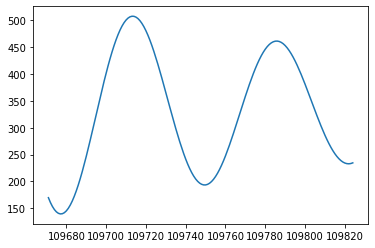

In [ ]:
# 결측치 처리 형태 확인 (일곱 번째 구간)

plt.plot(total[6], gangwha.iloc[total[6], 0])
plt.show()

In [ ]:
gangwha.to_csv('강화대교 조위_처리완료.csv')